In [1]:
from spacerocks.linking.streak import Streak
from spacerocks.units import Units
from astropy import units as u
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
units = Units()
units.ra = 'arcsec'
units.dec = 'arcsec'
units.ra_rate = u.arcsec/u.hour
units.dec_rate = u.arcsec/u.hour

In [6]:
ra0 = 1000811.36248089
dec0 = -107999.54254414
n_points = 500
dtheta = 2 * np.pi / n_points
theta = np.arange(0, 2 * np.pi, dtheta)
radius = 1
ras = ra0 + radius * np.cos(theta)
decs = dec0 + radius * np.sin(theta)

In [7]:
epochs = np.repeat('24 April 2024', n_points)
dec_rates = np.repeat(0.0, n_points)
ra_rates = np.repeat(-2, n_points)
obscode = 'W84'
r_rate = 0.05
r = 40

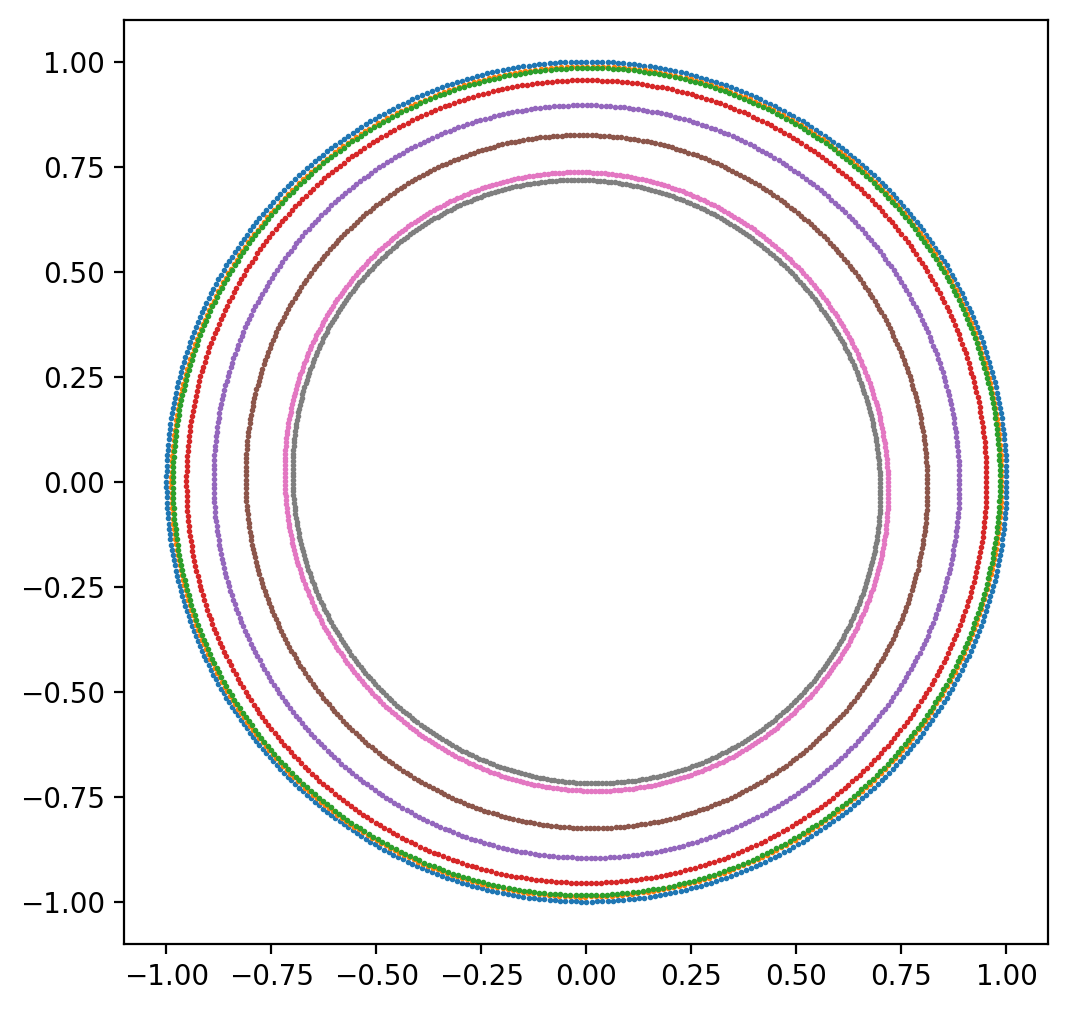

In [8]:
dts = [1, 10, 100, 365, 1000, 5_000, 10_000]

streak = Streak(ras, decs, ra_rates, dec_rates, epochs, obscode, units=units)
rocks = streak.generate_orbits(r=r, r_rate=r_rate)
obs0 = rocks.observe(obscode='W84')
#obs0 = rocks.observe(spiceid='ssb')
fig, ax = plt.subplots(figsize=(6, 6))
ra1, dec1 = np.nanmean(obs0.ra.arcsec), np.nanmean(obs0.dec.arcsec)
ax.scatter(obs0.ra.arcsec - ra1, obs0.dec.arcsec - dec1, s=1, label='t0')

for dt in dts:

    streak = Streak(ras, decs, ra_rates, dec_rates, epochs, obscode, units=units)
    rocks = streak.generate_orbits(r=r, r_rate=r_rate)

    prop = rocks.analytic_propagate(epoch=rocks.epoch.utc.jd[0] + dt)
    #prop, _, _ = rocks.propagate(epochs=rocks.epoch.utc.jd[0] + dt, model='GIANTS', progress=True)

    #obs1 = prop.observe(obscode='W84')
    obs1 = prop.observe(spiceid='ssb')

    ra2, dec2 = np.nanmean(obs1.ra.arcsec), np.nanmean(obs1.dec.arcsec)
    ax.scatter(obs1.ra.arcsec - ra2, obs1.dec.arcsec - dec2, s=1, label=f"{dt} days later")

ax.set_aspect('equal')
#ax.legend()